iii) Plot a graph comparing the following three loss functions vs
accuracy

a)Multi-Class Cross-Entropy Loss

b)Sparse Multiclass Cross-Entropy Loss

c)Kullback Leibler Divergence Loss

In [ ]:
# mlp for regression with mse loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
import pandas as pd




In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/psantul/Dataset/main/titanic.csv",delimiter = ',', encoding='latin-1')
print(data.shape)
data.head()


(2201, 4)


,Class,Age,Sex,target
0,-1.8700,-0.228,0.521,-1.0
1,-0.9230,-0.228,-1.920,1.0
2,-0.9230,-0.228,-1.920,1.0
3,0.9650,-0.228,0.521,1.0
4,0.0214,-0.228,0.521,-1.0


In [ ]:
X = data.iloc[:,3:].values
y = data.iloc[:,1].values

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential






# define model
model = Sequential()
model.add(Dense(25, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)

In [ ]:
X_test.shape, y_test.shape

((441, 1), (441,))

In [ ]:
X.shape, y.shape

((2201, 1), (2201,))

In [ ]:
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

In [ ]:
# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)

Train: 0.051, Test: 0.041


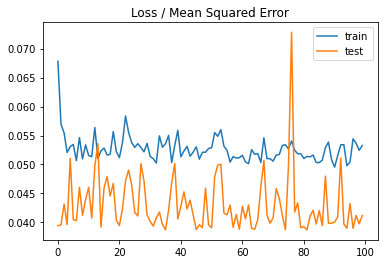

In [ ]:
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

#Kullback Leibler Divergence Loss

In [ ]:
from keras.utils import to_categorical
# one hot encode output variable
y = to_categorical(y)

Train: 0.935, Test: 0.943


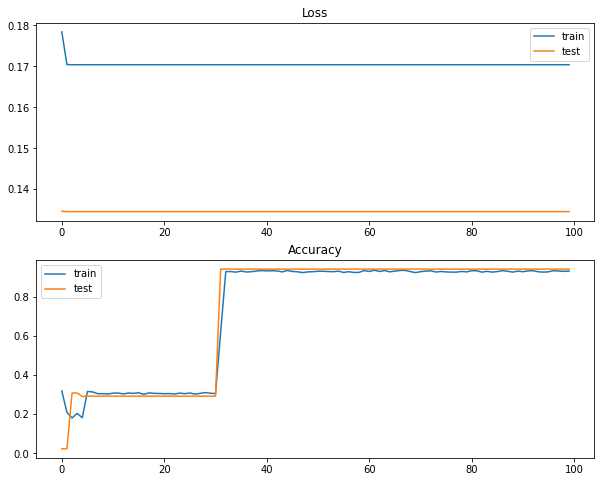

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='kullback_leibler_divergence', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.figure(figsize=(10,8))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


#Sparse Multiclass Cross-Entropy Loss

Train: 0.948, Test: 0.959


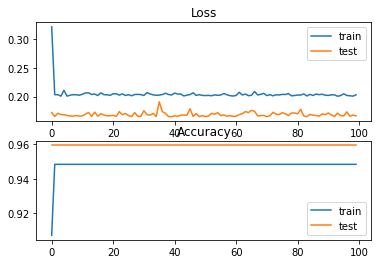

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()